# AutoRec模型

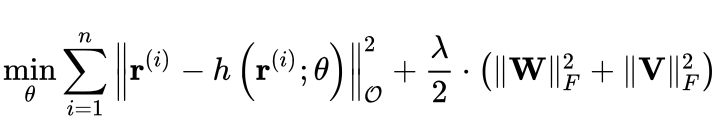

### 简单的三层神经网络，输入物品i的m维向量，经过隐藏层后输出新的m维向量

### 通过训练更新参数矩阵 V 和 W 使得输入输出尽可能的相同

### 损失函数：平方误差加正则
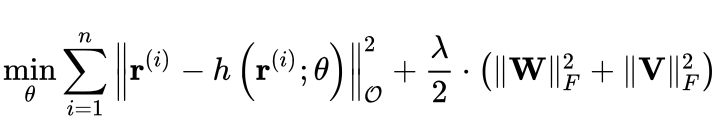

In [19]:
import pandas as pd
import numpy as np

In [21]:
rnames = ['user_id', 'movie_id', 'rating','timestamp']
ratings = pd.read_table('ratings.dat',sep= '::', header = None, names = rnames,engine = 'python')
ratings[:5]

FileNotFoundError: [Errno 2] No such file or directory: 'ratings.dat'

In [8]:
import torch
import torch.nn as nn
import numpy as np
from torch.autograd import variable
import math
import time
import argparse
import torch.utils.data as Data
import torch.optim as optim

In [16]:
class Autorec(nn.Module):
    def __init__(self):
        super(Autorec, self).__init__()
        
        self.num_users = 6040
        self.num_items = 3952
        self.hidden_units = 200
        self.lambda_value = 0.1
        
        # X=Sigmoid(R*V)
        self.encoder = nn.Sequential(
            nn.Linear(self.num_items, self.hidden_units),
            nn.Sigmoid()
        )
        # X*W输出out
        self.decoder = nn.Sequential(
            nn.Linear(self.hidden_units, self.num_items),
        )
    
    def forword(self,inp):
        inp=self.encoder(inp)
        out=self.decoder(inp)
        return out

In [18]:
model=Autorec()
cost = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
model

Autorec(
  (encoder): Sequential(
    (0): Linear(in_features=3952, out_features=200, bias=True)
    (1): Sigmoid()
  )
  (decoder): Sequential(
    (0): Linear(in_features=200, out_features=3952, bias=True)
  )
)

In [ ]:
    # criterion = nn.MSELoss()
    # optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    def loss(self,out,inp,optimizer):
        cost = 0
        temp2 = 0
        
        # RMSE
        cost += nn.MSELoss(out,inp)
        rmse = cost

